## Logistic Regression
- Gradient Descent Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.loadtxt('ex4Data/ex4x.dat', dtype = np.float32)
y = np.loadtxt('ex4Data/ex4y.dat', dtype = np.float32)

In [3]:
x.shape, y.shape

((80, 2), (80,))

In [4]:
x

array([[55.5, 69.5],
       [41. , 81.5],
       [53.5, 86. ],
       [46. , 84. ],
       [41. , 73.5],
       [51.5, 69. ],
       [51. , 62.5],
       [42. , 75. ],
       [53.5, 83. ],
       [57.5, 71. ],
       [42.5, 72.5],
       [41. , 80. ],
       [46. , 82. ],
       [46. , 60.5],
       [49.5, 76. ],
       [41. , 76. ],
       [48.5, 72.5],
       [51.5, 82.5],
       [44.5, 70.5],
       [44. , 66. ],
       [33. , 76.5],
       [33.5, 78.5],
       [31.5, 72. ],
       [33. , 81.5],
       [42. , 59.5],
       [30. , 64. ],
       [61. , 45. ],
       [49. , 79. ],
       [26.5, 64.5],
       [34. , 71.5],
       [42. , 83.5],
       [29.5, 74.5],
       [39.5, 70. ],
       [51.5, 66. ],
       [41.5, 71.5],
       [42.5, 79.5],
       [35. , 59.5],
       [38.5, 73.5],
       [32. , 81.5],
       [46. , 60.5],
       [36.5, 53. ],
       [36.5, 53.5],
       [24. , 60.5],
       [19. , 57.5],
       [34.5, 60. ],
       [37.5, 64.5],
       [35.5, 51. ],
       [37. ,

In [5]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

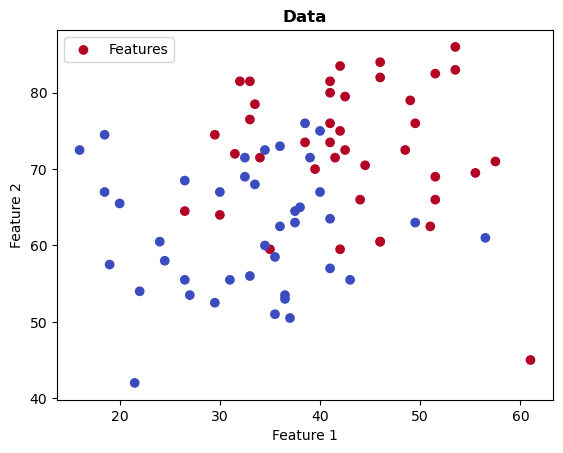

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', label="Features")
plt.title("Data", fontweight='bold')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
X = np.ones([x.shape[0], 3])

In [8]:
X[:, 1] = x[:, 0]
X[:, 2] = x[:, 1]
X

array([[ 1. , 55.5, 69.5],
       [ 1. , 41. , 81.5],
       [ 1. , 53.5, 86. ],
       [ 1. , 46. , 84. ],
       [ 1. , 41. , 73.5],
       [ 1. , 51.5, 69. ],
       [ 1. , 51. , 62.5],
       [ 1. , 42. , 75. ],
       [ 1. , 53.5, 83. ],
       [ 1. , 57.5, 71. ],
       [ 1. , 42.5, 72.5],
       [ 1. , 41. , 80. ],
       [ 1. , 46. , 82. ],
       [ 1. , 46. , 60.5],
       [ 1. , 49.5, 76. ],
       [ 1. , 41. , 76. ],
       [ 1. , 48.5, 72.5],
       [ 1. , 51.5, 82.5],
       [ 1. , 44.5, 70.5],
       [ 1. , 44. , 66. ],
       [ 1. , 33. , 76.5],
       [ 1. , 33.5, 78.5],
       [ 1. , 31.5, 72. ],
       [ 1. , 33. , 81.5],
       [ 1. , 42. , 59.5],
       [ 1. , 30. , 64. ],
       [ 1. , 61. , 45. ],
       [ 1. , 49. , 79. ],
       [ 1. , 26.5, 64.5],
       [ 1. , 34. , 71.5],
       [ 1. , 42. , 83.5],
       [ 1. , 29.5, 74.5],
       [ 1. , 39.5, 70. ],
       [ 1. , 51.5, 66. ],
       [ 1. , 41.5, 71.5],
       [ 1. , 42.5, 79.5],
       [ 1. , 35. , 59.5],
 

In [9]:
one = np.ones([x.shape[0], 1])
X = np.concatenate((one, x), axis=1)
X

array([[ 1. , 55.5, 69.5],
       [ 1. , 41. , 81.5],
       [ 1. , 53.5, 86. ],
       [ 1. , 46. , 84. ],
       [ 1. , 41. , 73.5],
       [ 1. , 51.5, 69. ],
       [ 1. , 51. , 62.5],
       [ 1. , 42. , 75. ],
       [ 1. , 53.5, 83. ],
       [ 1. , 57.5, 71. ],
       [ 1. , 42.5, 72.5],
       [ 1. , 41. , 80. ],
       [ 1. , 46. , 82. ],
       [ 1. , 46. , 60.5],
       [ 1. , 49.5, 76. ],
       [ 1. , 41. , 76. ],
       [ 1. , 48.5, 72.5],
       [ 1. , 51.5, 82.5],
       [ 1. , 44.5, 70.5],
       [ 1. , 44. , 66. ],
       [ 1. , 33. , 76.5],
       [ 1. , 33.5, 78.5],
       [ 1. , 31.5, 72. ],
       [ 1. , 33. , 81.5],
       [ 1. , 42. , 59.5],
       [ 1. , 30. , 64. ],
       [ 1. , 61. , 45. ],
       [ 1. , 49. , 79. ],
       [ 1. , 26.5, 64.5],
       [ 1. , 34. , 71.5],
       [ 1. , 42. , 83.5],
       [ 1. , 29.5, 74.5],
       [ 1. , 39.5, 70. ],
       [ 1. , 51.5, 66. ],
       [ 1. , 41.5, 71.5],
       [ 1. , 42.5, 79.5],
       [ 1. , 35. , 59.5],
 

In [10]:
def hypothesis(x, w):
    return 1/(1+np.exp(-np.dot(x, w)))

In [11]:
def cost(x, y, w):
    return -(1/x.shape[0]) * np.sum(y * np.log(hypothesis(x, w)) + (1-y) * np.log(1 - hypothesis(x, w)))

In [12]:
def gradient(x, y, w):
    return 1/x.shape[0] * x.T.dot(hypothesis(x, w) - y)

In [13]:
w = np.array([0.0, 0.0, 0.0])

costVal = []
epochs = []

for i in range(1, 1000000):
    _cost = cost(X, y, w)
    costVal.append(_cost)
    w = w - 0.001 * gradient(X, y, w)
    epochs.append(i)
    
    if i % 100000 == 0:
        print(f"Epoch: {i} = Loss: {_cost}")

Epoch: 100000 = Loss: 0.5434021054399033
Epoch: 200000 = Loss: 0.48830093892921556
Epoch: 300000 = Loss: 0.4594186892101596
Epoch: 400000 = Loss: 0.4425373952843611
Epoch: 500000 = Loss: 0.4318993142612197
Epoch: 600000 = Loss: 0.42482764946484636
Epoch: 700000 = Loss: 0.4199382417003863
Epoch: 800000 = Loss: 0.4164551219118579
Epoch: 900000 = Loss: 0.4139152662637862


In [14]:
w

array([-12.88019331,   0.12241754,   0.12226225])

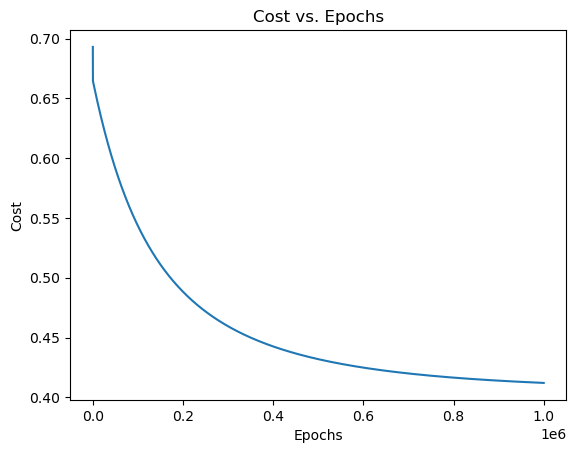

In [15]:
plt.plot(epochs, costVal)
plt.title("Cost vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

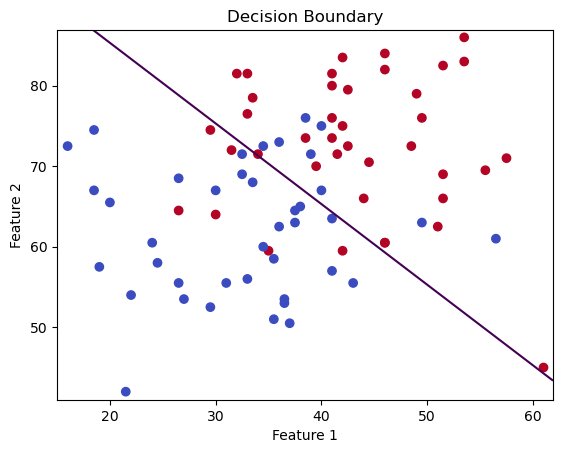

In [16]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = hypothesis(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], w)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---
### Newton's Method Implementation

In [17]:
# Hessian Matrix
def H(X, w):
    h = hypothesis(X, w)
    S = np.diag(h * (1 - h))
    hessian = (1 / X.shape[0]) * X.T.dot(S).dot(X)
    return hessian

In [18]:
# Hessian-Based Optimization
w = np.array([0.0, 0.0, 0.0])
costVal = []
epochs = []
for i in range(1, 3000):
    l = cost(X, y, w)
    costVal.append(l)
    grad = gradient(X, y, w)
    hess = H(X, w)
    w = w - 0.002 *np.linalg.inv(hess).dot(grad)  # lr is not needed for Newton's method because it calculates an exact step size using the Hessian inverse.
    epochs.append(i)
    
    if i % 100 == 0:
        print(f'epoch {i}: loss = {l:.3f}')

epoch 100: loss = 0.620
epoch 200: loss = 0.566
epoch 300: loss = 0.527
epoch 400: loss = 0.497
epoch 500: loss = 0.474
epoch 600: loss = 0.457
epoch 700: loss = 0.443
epoch 800: loss = 0.433
epoch 900: loss = 0.426
epoch 1000: loss = 0.420
epoch 1100: loss = 0.416
epoch 1200: loss = 0.413
epoch 1300: loss = 0.411
epoch 1400: loss = 0.409
epoch 1500: loss = 0.408
epoch 1600: loss = 0.407
epoch 1700: loss = 0.407
epoch 1800: loss = 0.406
epoch 1900: loss = 0.406
epoch 2000: loss = 0.406
epoch 2100: loss = 0.406
epoch 2200: loss = 0.406
epoch 2300: loss = 0.406
epoch 2400: loss = 0.406
epoch 2500: loss = 0.406
epoch 2600: loss = 0.405
epoch 2700: loss = 0.405
epoch 2800: loss = 0.405
epoch 2900: loss = 0.405


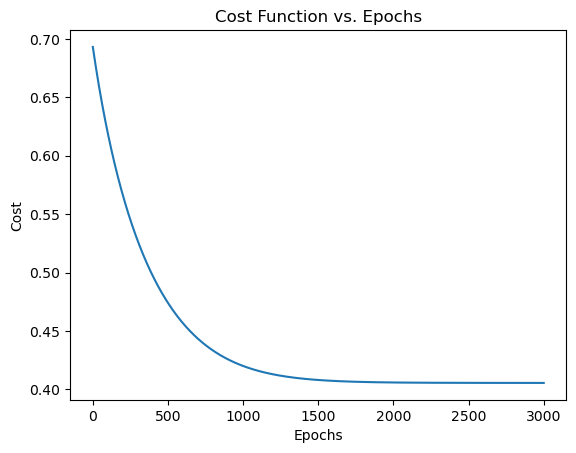

In [19]:
# Plot Cost Function
plt.plot(epochs, costVal)
plt.title("Cost Function vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

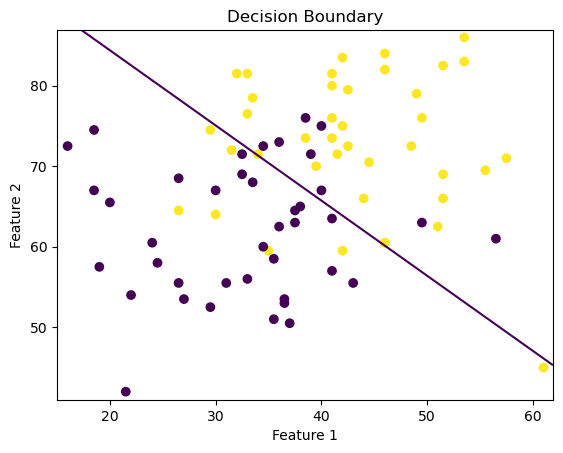

In [20]:
# Decision Boundary Visualization
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = hypothesis(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], w)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()